In [11]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

In [4]:
os.chdir('D:\\MDA\\Course\\Boot Camp\\SCMA 632\\Assignments\\A3')

In [5]:
nss = pd.read_csv("NSSO68.csv")

C:\Users\vijay\AppData\Local\Temp\ipykernel_32744\1800478961.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  nss = pd.read_csv("NSSO68.csv")


In [6]:
nss.shape

(101662, 384)

In [17]:
# Set working directory
os.chdir('D:\\MDA\\Course\\Boot Camp\\SCMA 632\\Assignments\\A3')

# Load dataset
data = pd.read_csv("NSSO68.csv")

# Subset data to state assigned
bhr = data[data['state_1'] == 'Bhr'][['Religion', 'emftt_q', 'emftt_v']]
bhrnew = data[data['state_1'] == 'Bhr'][['Religion','eggsno_q','fishprawn_q','goatmeat_q','beef_q','pork_q','chicken_q','othrbirds_q']]

# Check for missing values
print(bhr.isnull().sum())
print(bhrnew.isnull().sum())


C:\Users\vijay\AppData\Local\Temp\ipykernel_32744\2090876308.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NSSO68.csv")


Religion    0
emftt_q     0
emftt_v     0
dtype: int64
Religion       0
eggsno_q       0
fishprawn_q    0
goatmeat_q     0
beef_q         0
pork_q         0
chicken_q      0
othrbirds_q    0
dtype: int64


In [18]:
bhr.shape, bhrnew.shape

((4582, 3), (4582, 8))

In [19]:
religion_mapping = {1:'Hinduism', 2:'Islam', 3:'Christianity',5:'Jainism',9:'Others'}
bhrnew['Religion'] = bhrnew['Religion'].replace(religion_mapping)
print(bhrnew['Religion'].value_counts())

Religion
Hinduism        3944
Islam            627
Christianity       8
Others             2
Jainism            1
Name: count, dtype: int64


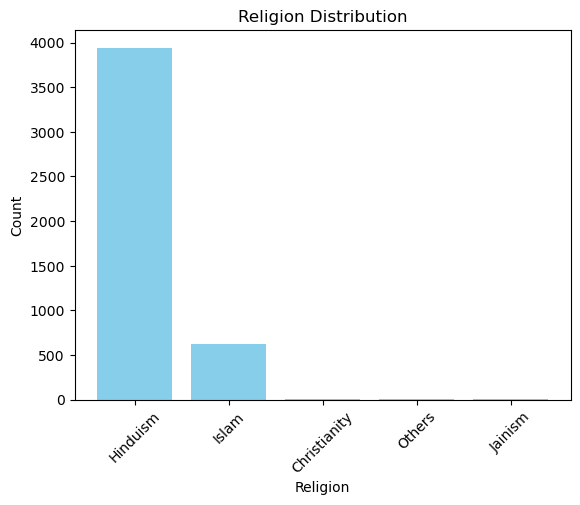

In [13]:
religion_counts = pd.Series([3944, 627, 8, 2, 1], index=['Hinduism', 'Islam', 'Christianity', 'Others', 'Jainism'])
plt.bar(religion_counts.index, religion_counts.values, color='skyblue')  # Adjust color as desired
plt.xlabel("Religion")
plt.ylabel("Count")
plt.title("Religion Distribution")
plt.xticks(rotation=45)
plt.show()

In [14]:
bhr.dtypes

Religion     object
emftt_q     float64
emftt_v     float64
dtype: object

In [20]:
columns = ['eggsno_q','fishprawn_q','goatmeat_q','beef_q','pork_q','chicken_q','othrbirds_q']
data = bhrnew[columns].copy()

In [21]:
data.dtypes

eggsno_q       float64
fishprawn_q    float64
goatmeat_q     float64
beef_q         float64
pork_q         float64
chicken_q      float64
othrbirds_q    float64
dtype: object

### Probit Regression

In [22]:
data['target'] = np.where(data['eggsno_q'] > 0,1,0)
x = data.drop(['eggsno_q'], axis = 1)
x = sm.add_constant(x)
y = data['target']

In [23]:
prodit_model = sm.Probit(y,x).fit()
print(prodit_model.summary())

         Current function value: 0.000000
         Iterations: 35
                          Probit Regression Results                           
Dep. Variable:                 target   No. Observations:                 4582
Model:                         Probit   Df Residuals:                     4574
Method:                           MLE   Df Model:                            7
Date:                Mon, 01 Jul 2024   Pseudo R-squ.:                   1.000
Time:                        12:05:25   Log-Likelihood:            -7.4913e-12
converged:                      False   LL-Null:                       -2326.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.8291   5.91e+04     -0.000      1.000   -1.16e+05    1.16e+05
fishprawn_q    -0.1037   2.94e+05  -3.53e-07      1.000   -5.7

C:\Users\vijay\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\vijay\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\vijay\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\vijay\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\vijay\anaconda3

In [ ]:
religion_mapping = {1:'Hinduism', 2:'Islam', 3:'Christianity',5:'Jainism',9:'Others'}
bhr['Religion'] = bhr['Religion'].replace(religion_mapping)
print(bhr['Religion'].value_counts())

In [ ]:
nv_by_religion = bhr.groupby('Religion')['emftt_q'].count()
max_nv_religion = nv_by_religion.idxmax()

print("The religion with the highest non-veg consumption is:", max_nv_religion)

### Tobit Regression

In [ ]:
y = nss['foodtotal_v']  
X = nss[['sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v', 'fv_tot']]  

In [ ]:
class TobitModel:
    def __init__(self, endog, exog, lower=None, upper=None):
        self.endog = endog
        self.exog = exog
        self.lower = lower
        self.upper = upper

    def loglik(self, params):
        beta = params[:-1]
        sigma = params[-1]
        mu = np.dot(self.exog, beta)
        
        # Ensure sigma is positive
        sigma = np.abs(sigma) + 1e-10
        
        # Calculate the log-likelihood
        llf = np.zeros_like(self.endog, dtype=float)

        # Censored from below
        if self.lower is not None:
            llf = np.where(
                self.endog == self.lower,
                np.log(np.clip(norm.cdf((self.lower - mu) / sigma), 1e-10, 1)),
                llf
            )

        # Censored from above
        if self.upper is not None:
            llf = np.where(
                self.endog == self.upper,
                np.log(np.clip(1 - norm.cdf((self.upper - mu) / sigma), 1e-10, 1)),
                llf
            )

        # Uncensored
        uncensored = (self.endog > self.lower) & (self.endog < self.upper)
        llf[uncensored] = -0.5 * np.log(2 * np.pi) - np.log(sigma) - (self.endog[uncensored] - mu[uncensored]) ** 2 / (2 * sigma ** 2)

        return -np.sum(llf)

    def fit(self):
        start_params = np.append(np.zeros(self.exog.shape[1]), 1)
        res = minimize(self.loglik, start_params, method='L-BFGS-B')
        return res

In [ ]:
y_tobit = np.clip(y, 0, 1)
X_tobit = sm.add_constant(X)

model = TobitModel(y_tobit, X_tobit, lower=0, upper=1)
results = model.fit()

In [ ]:
print("Tobit Model Results:")
print(results)